In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing required modules
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/drive/Othercomputers/Lenovo/Machine_Learning/Miscellenous/Birmingham City/AI Fundamentals/Data.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')


File Name                                             Modified             Size
crime.csv                                      2019-09-20 22:05:40     58922129
googletrend.csv                                2019-09-20 22:05:46         2451
Crime_Analysis_v2.ipynb                        2022-08-08 23:31:16      1592757
Extracting all the files now...
Done!


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
        
data = pd.read_csv("/content/crime.csv")
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [4]:
# data.shape
print('number of rows in the dataset are : ', data.shape[0], 'number of columns in the dataset are : ', data.shape[1] )

number of rows in the dataset are :  530652 number of columns in the dataset are :  12


In [5]:
data.dtypes

TYPE              object
YEAR               int64
MONTH              int64
DAY                int64
HOUR             float64
MINUTE           float64
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
Latitude         float64
Longitude        float64
dtype: object

In [6]:
data.nunique()

TYPE                 11
YEAR                 15
MONTH                12
DAY                  31
HOUR                 24
MINUTE               60
HUNDRED_BLOCK     21204
NEIGHBOURHOOD        24
X                 95502
Y                 93544
Latitude         101885
Longitude         98972
dtype: int64

In [7]:
data.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

In [8]:
data.drop(['MINUTE', 'X', 'Y', 'Latitude', 'Longitude'], axis=1, inplace=True)
data.dropna(inplace=True)
data.shape

(474015, 7)

In [9]:
data.reset_index(drop=True, inplace=True)

#Plot 1

In [10]:
#How many crimes were commited in these neighbourhoods?
count_type= data[['NEIGHBOURHOOD','YEAR','TYPE']].groupby(['YEAR','NEIGHBOURHOOD']).count().reset_index(drop=False)
print(count_type)

     YEAR              NEIGHBOURHOOD  TYPE
0    2003              Arbutus Ridge   616
1    2003  Central Business District  9818
2    2003          Dunbar-Southlands   773
3    2003                   Fairview  3476
4    2003         Grandview-Woodland  3140
..    ...                        ...   ...
355  2017                 Strathcona   806
356  2017                     Sunset   407
357  2017        Victoria-Fraserview   325
358  2017                   West End  1360
359  2017            West Point Grey   206

[360 rows x 3 columns]


In [11]:
def group_data(df,col1,col2):
    subdata = df.groupby([col1,col2]).count().reset_index(drop=False)
    subdata = subdata[[col1,col2,'TYPE']]
    subdata.columns = [col1,col2,'Counts']
    return subdata

att_dept = group_data(data,'NEIGHBOURHOOD','YEAR')
att_dept

,NEIGHBOURHOOD,YEAR,Counts
0,Arbutus Ridge,2003,616
1,Arbutus Ridge,2004,649
2,Arbutus Ridge,2005,619
3,Arbutus Ridge,2006,441
4,Arbutus Ridge,2007,361
...,...,...,...
355,West Point Grey,2013,279
356,West Point Grey,2014,365
357,West Point Grey,2015,363
358,West Point Grey,2016,399


In [12]:
cmap = plt.get_cmap('Pastel2')

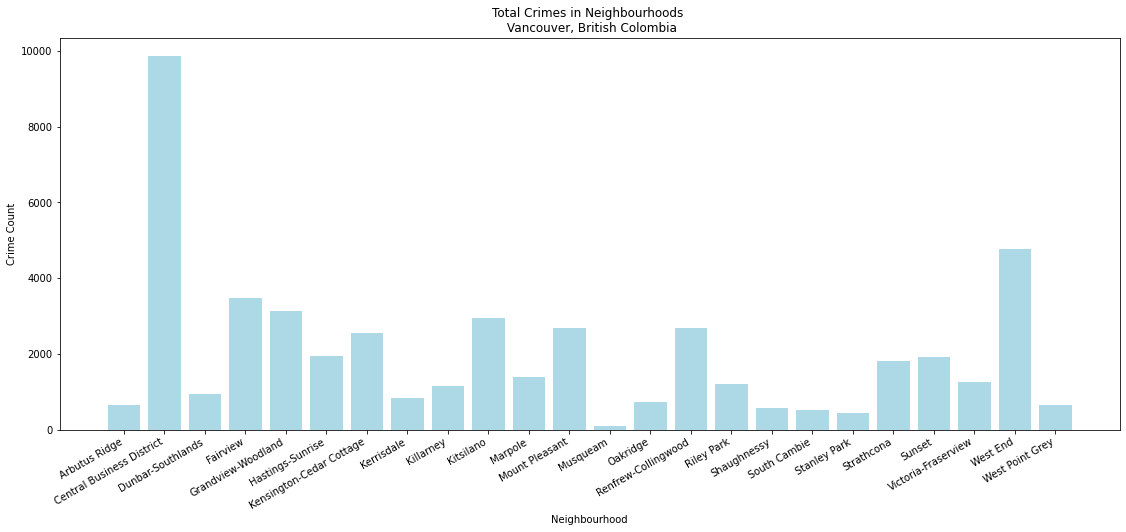

In [13]:
fig , ax = plt.subplots(figsize=[19,8])

ax.bar(att_dept['NEIGHBOURHOOD'],att_dept.Counts,color = 'lightblue')
fig.autofmt_xdate()

plt.title('Total Crimes in Neighbourhoods \n Vancouver, British Colombia')
plt.xlabel('Neighbourhood')
plt.ylabel('Crime Count')

plt.show()

#Plot 2

In [14]:
crimes = pd.read_csv('/content/crime.csv')
crimes.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [15]:
g=pd.DataFrame(crimes.groupby(['NEIGHBOURHOOD', 'TYPE']).count().reset_index().sort_values('YEAR',ascending=False))
g=g[['NEIGHBOURHOOD','TYPE','YEAR']].sort_values(['NEIGHBOURHOOD', 'YEAR'],ascending=[True,False]).rename(columns={'YEAR':'NUMBER OF OCCURENCES'}).reset_index()
del g['index']
g

,NEIGHBOURHOOD,TYPE,NUMBER OF OCCURENCES
0,Arbutus Ridge,Theft from Vehicle,1852
1,Arbutus Ridge,Break and Enter Residential/Other,1672
2,Arbutus Ridge,Mischief,934
3,Arbutus Ridge,Theft of Vehicle,498
4,Arbutus Ridge,Other Theft,337
...,...,...,...
211,West Point Grey,Theft of Bicycle,372
212,West Point Grey,Break and Enter Commercial,331
213,West Point Grey,Vehicle Collision or Pedestrian Struck (with I...,305
214,West Point Grey,Other Theft,260


In [16]:
#At what time most of the crimes occurred
byHour=pd.value_counts(crimes['HOUR']).sort_index(ascending=True)

flatByHour = []
for i in range(0,len(byHour)):
    flatByHour.append(np.repeat(i, byHour[i]))
    
arr=np.concatenate(flatByHour, axis=0 )  

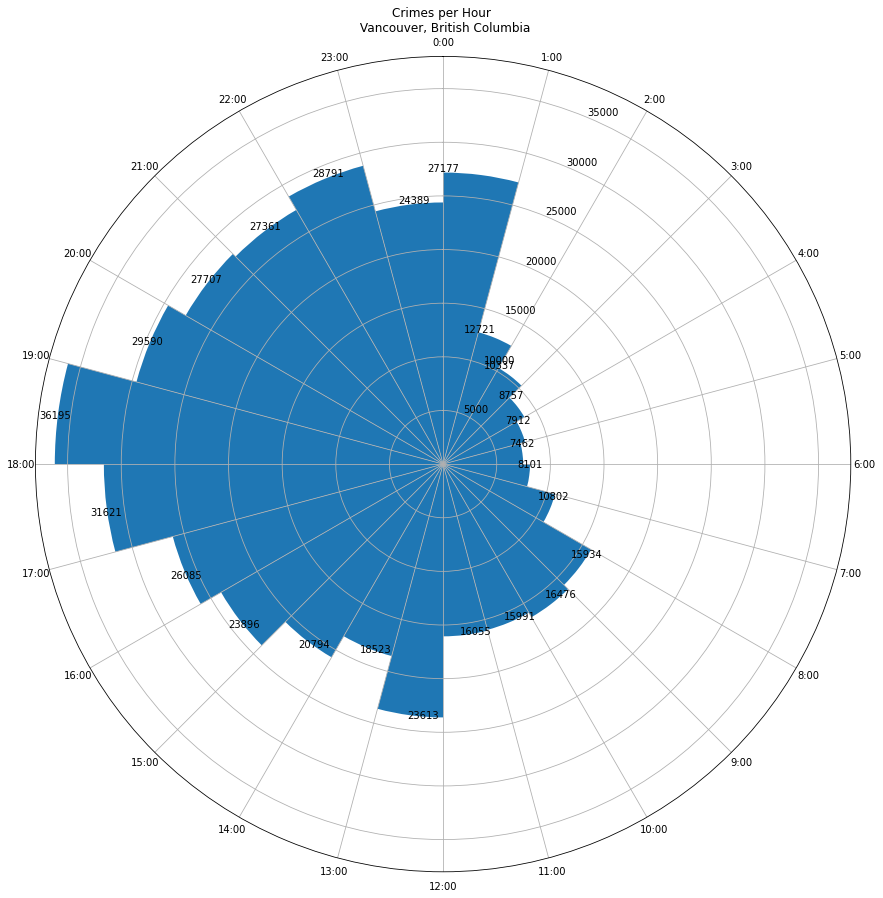

In [17]:
N = 24

# Creating theta for 24 hours with an offset, so that the bars for each hour would not be centered relative to the labels
theta = np.linspace(7.5*np.pi/180, 2 * np.pi + 7.5*np.pi/180, N, endpoint=False)

# Setting the properties for a polar plot
radii, tick = np.histogram(arr, bins = 24)
width = (2*np.pi) / N

# Plotting a polar plot
plt.figure(figsize = (15, 15))
ax = plt.subplot(111, projection='polar')
plt.title("Crimes per Hour \n Vancouver, British Columbia")

# Setting the ticks
thetaticks = np.arange(0, 360, 15)
ax.set_thetagrids(thetaticks)

bars = ax.bar(theta, radii, width=width)

# Set labels to go clockwise and start from the top
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Setting the labels
ticks = ['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
ax.set_xticklabels(ticks)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.005), ha='center')
    
#for i, t in enumerate(ax.patches()):
#    t.set_rotation(i*45)


plt.show()

#Plot 3

In [18]:
dfcrime = pd.read_csv('/content/crime.csv')
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [19]:
# Cleaning & Transforming the data
dfcrime['HOUR'].fillna(00, inplace = True)
dfcrime['NEIGHBOURHOOD'].fillna('N/A', inplace = True)
dfcrime['HUNDRED_BLOCK'].fillna('N/A', inplace = True)
#del dfcrime['MINUTE']
dfcrime['NeighbourhoodID'] = dfcrime.groupby('NEIGHBOURHOOD').ngroup().add(1)
dfcrime['CrimeTypeID'] = dfcrime.groupby('TYPE').ngroup().add(1)
dfcrime['Incident'] = 1
dfcrime['Date'] = pd.to_datetime({'year':dfcrime['YEAR'], 'month':dfcrime['MONTH'], 'day':dfcrime['DAY']})
#dfcrime['DayOfWeek'] = dfcrime['Date'].dt.weekday_name 
dfcrime['DayOfWeek'] = dfcrime['Date'].dt.strftime("%A")
dfcrime['DayOfWeekID'] = dfcrime['Date'].dt.weekday
dfpred = dfcrime[(dfcrime['YEAR'] >= 2017)]
dfcrime = dfcrime[(dfcrime['YEAR'] < 2017)]

# Calling a dataframe results
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek,DayOfWeekID
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-12,Monday,0
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-07,Wednesday,2
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-23,Wednesday,2
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-20,Sunday,6
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-12,Saturday,5


In [20]:
%matplotlib inline
#Has crime changed over the years? Is it decreasing?
# Crime count by Category per year
dfPivCrimeDate = dfcrime.pivot_table(values='Incident'
                                     ,aggfunc=np.size
                                     ,columns='TYPE'
                                     ,index='YEAR'
                                     ,fill_value=0)

In [21]:
tmp = dfPivCrimeDate

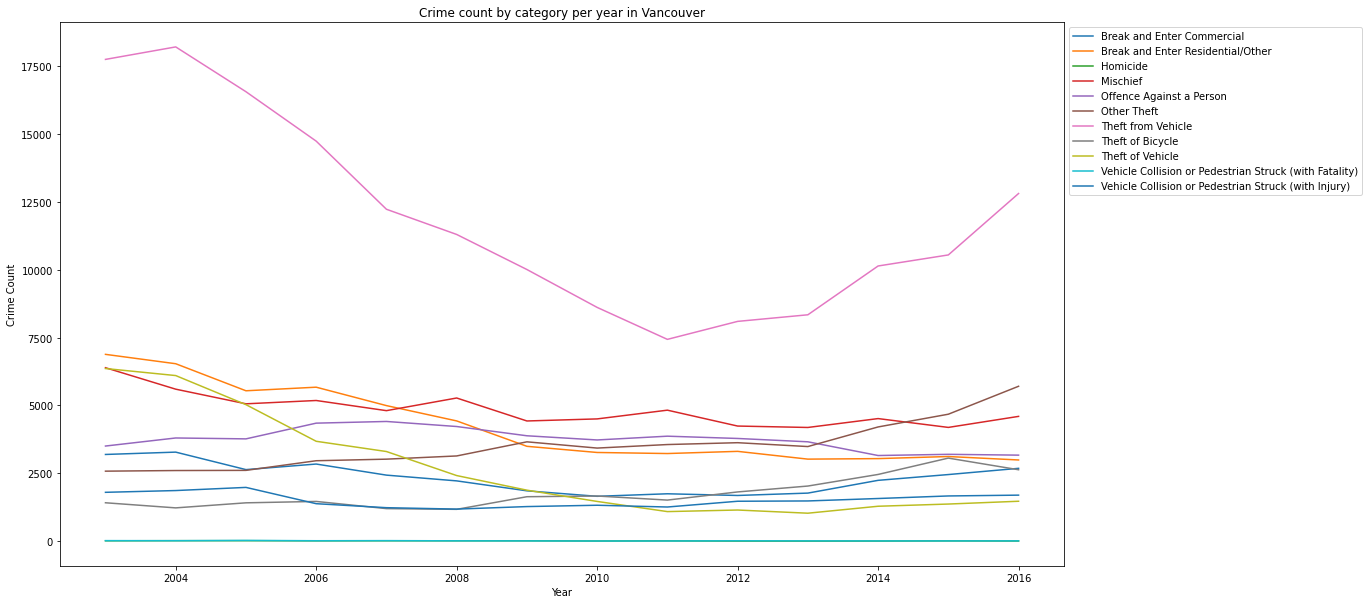

In [47]:
fig, ax = plt.subplots(figsize=(18, 10))
for col in tmp.columns:
    ax.plot(tmp.index, tmp[col], label=col)
    ax.set_xlabel('Year')
ax.set_ylabel('Crime Count')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add a title to the plot
plt.title('Crime count by category per year in Vancouver')

# Show the plot
plt.show()